# Day #1

- Date: 2024.05.19
- Due Date: 2024.05.19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1) REVIEW (Last week)

- plotly --> linear regression

In [4]:
import plotly.express as px

# 데이터 불러오기
df = px.data.tips()

#그래프 그리기
fig = px.scatter(df, x="total_bill", y="tip", trendline="ols")

fig.show()

In [6]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", color="sex", trendline="ols")

fig.show()

In [7]:
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", color="sex", trendline="ols",trendline_scope="overall")

fig.show()

In [8]:
results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 19 May 2024   Prob (F-statistic):           6.69e-34
Time:                        20:42:02   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
x1             0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2) TODAY: Linear Regression (by Random Number)

In [11]:
a = 3
b = 5 

x = np.arange(-10, 10, 1)
y = a * x + b

([<matplotlib.axis.XTick at 0x1343f5fa0>,
 [Text(-10, 0, '−10'),
  Text(-9, 0, '−9'),
  Text(-8, 0, '−8'),
  Text(-7, 0, '−7'),
  Text(-6, 0, '−6'),
  Text(-5, 0, '−5'),
  Text(-4, 0, '−4'),
  Text(-3, 0, '−3'),
  Text(-2, 0, '−2'),
  Text(-1, 0, '−1'),
  Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

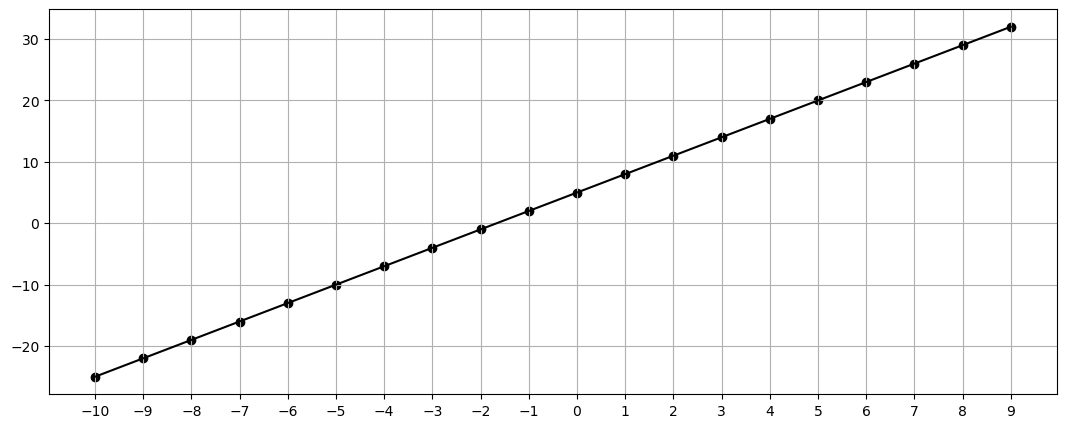

In [17]:
plt.figure(figsize=(13, 5))
plt.plot(x, y, color='black')
plt.scatter(x, y, color='black')
plt.grid()
plt.xticks(np.arange(-10, 10, 1))

- Add: Random Noise 

In [51]:
x = np.random.normal(0, 10, 100)
n = np.random.normal(0, 20, 100)

y = a * x + b + n
y_original = a * x + b

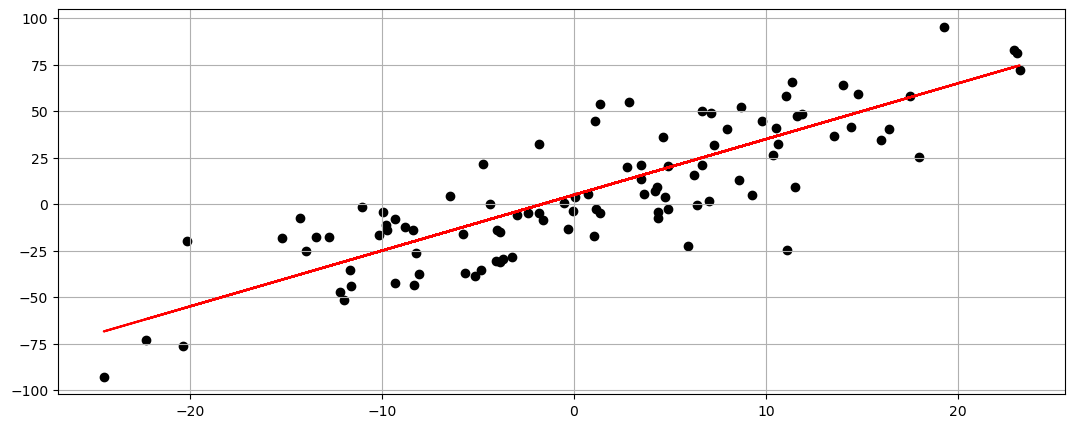

In [54]:
plt.figure(figsize=(13, 5))
plt.plot(x, y_original, color='red')
plt.scatter(x, y, color='black')
plt.grid()

### Package Install

- conda activate palette-basic
- pip install scikit-learn

- scikit-learn package --> linear regression

In [73]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X=x.reshape(-1, 1), y=y)

LinearRegression()

y = model.coef_ * x + model.intercept_

In [97]:
model.coef_

array([2.90923711])

In [98]:
model.intercept_

3.00146386946096

In [75]:
prediction_result = model.predict(x.reshape(-1, 1))
ground_truth = y

In [81]:
MAE = np.mean(np.abs(prediction_result - ground_truth))
MSE = np.mean((prediction_result - ground_truth)**2)

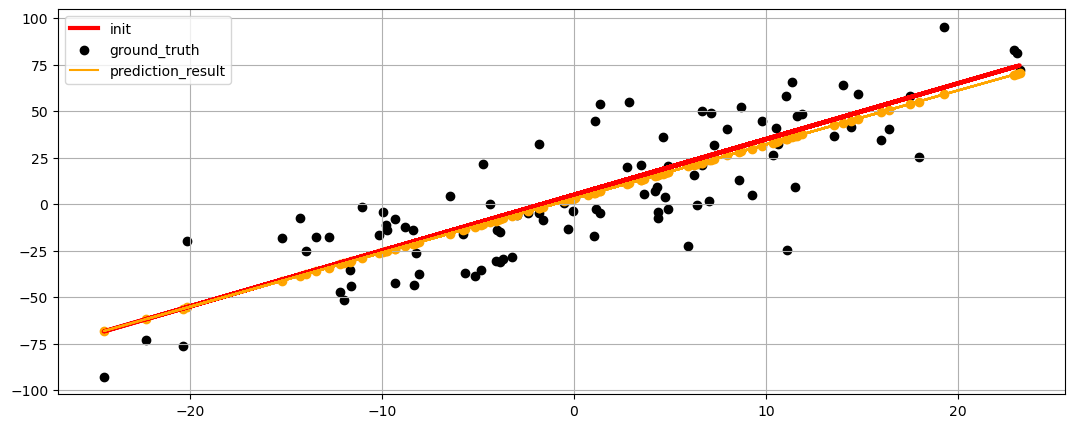

In [95]:
plt.figure(figsize=(13, 5))
plt.plot(x, a*x+b, color='red', label='init', linewidth=3)
plt.scatter(x, ground_truth, color='black', label='ground_truth')
plt.scatter(x, prediction_result, color='orange')
plt.plot(x, prediction_result, color='orange', label='prediction_result')
plt.grid()
plt.legend()